  데이터 전처리
* 데이터 클린징
* 결손값 처리
* 데이터 인코딩
* 데이터 스케일링
* 이상치 제거 
* feature 선택, 추출, 가공

## LableEncoder()
> sklearn.preprocessing.LabelEncoder


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [5]:
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩변환값', labels)

인코딩변환값 [0 1 4 5 3 3 2 2]


In [6]:
print('인코딩 클래스', encoder.classes_)
print('디코딩 원본 값', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 클래스 ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값 ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### Train.csv
* Survived, Sex, Age, Embarked 컬럼만 이용하려고 한다. 
* 피쳐는 Sex, Age, Embarked 사용하고 
* 레이블은 Survived 사용하여 지도학습
* 데이터의 전처리가 필요한 상황이라 
* 데이터 전처리를 해야 하는데 결측치가 관찰되어 결측치 처리하고 문자열을 인코딩 해주어야 한다. 
* 결측치는 평균값으로 인코딩은 labelencoding을 이용하여 처리한 결과를 데이터 프레임으로 출력

In [7]:
import pandas as pd
train = pd.read_csv('train.csv')

In [8]:
train_dt = train[['Survived', 'Sex', 'Age', 'Embarked']]
train_dt

,Survived,Sex,Age,Embarked
0,0,male,22.0,S
1,1,female,38.0,C
2,1,female,26.0,S
3,1,female,35.0,S
4,0,male,35.0,S
...,...,...,...,...
886,0,male,27.0,S
887,1,female,19.0,S
888,0,female,NaN,S
889,1,male,26.0,C


In [9]:
train_dt.isna().sum()

Survived      0
Sex           0
Age         177
Embarked      2
dtype: int64

In [10]:
import numpy as np
age_mean = np.round(train_dt['Age'].mean(), 2)
age_mean

29.7

In [11]:
train_dt['Age'].fillna(age_mean, inplace=True)
train_dt['Embarked'].fillna('S', inplace=True)

C:\Users\0327c\AppData\Local\Temp\ipykernel_1612\3174069887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dt['Age'].fillna(age_mean, inplace=True)
C:\Users\0327c\AppData\Local\Temp\ipykernel_1612\3174069887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dt['Embarked'].fillna('S', inplace=True)


In [12]:
train_dt.isna().sum()

Survived    0
Sex         0
Age         0
Embarked    0
dtype: int64

In [13]:
encoder = LabelEncoder()
labels = encoder.fit_transform(train_dt['Sex'])
# print(labels)
labels_2 = encoder.fit_transform(train_dt['Embarked'])
# print(labels_2)

In [14]:
print(encoder.classes_)

['C' 'Q' 'S']


In [15]:
train_dt['Sex'] = labels
train_dt['Embarked'] = labels_2

C:\Users\0327c\AppData\Local\Temp\ipykernel_1612\1228232217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dt['Sex'] = labels
C:\Users\0327c\AppData\Local\Temp\ipykernel_1612\1228232217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dt['Embarked'] = labels_2


In [16]:
train_dt

,Survived,Sex,Age,Embarked
0,0,1,22.0,2
1,1,0,38.0,0
2,1,0,26.0,2
3,1,0,35.0,2
4,0,1,35.0,2
...,...,...,...,...
886,0,1,27.0,2
887,1,0,19.0,2
888,0,0,29.7,2
889,1,1,26.0,0


## OneHotEncoder()
> sklearn.preprocessing.OneHotEncoder
* OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None)

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [19]:
# encoder = LabelEncoder()
# encoder.fit(items)
# labels = encoder.transform(items)
# labels = labels.reshape(-1,1)

# oh_encoder = OneHotEncoder()
# oh_encoder.fit(labels)
# oh_labels = oh_encoder.transform(labels)

# print('원-핫 인코딩 데이터')
# print(oh_labels.toarray())
# print()
# print('원-핫 인코딩 데이터 차원')
# print(oh_labels.shape)


In [20]:
import numpy as np

oh_encoder = OneHotEncoder()
items_array = np.array(items).reshape(-1.1)
data = oh_encoder.fit_transform(items_array)

data.toarray()

TypeError: 'float' object cannot be interpreted as an integer

### get_dummies()
> pandas.get_dummies
* get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv')
train_dt = train[['Survived', 'Sex', 'Age', 'Embarked']]

age_mean = np.round(train_dt['Age'].mean(), 1)

train_dt['Age'] = train_dt['Age'].fillna(age_mean)
train_dt['Embarked'] = train_dt['Embarked'].fillna('S')

In [21]:
train_dt.loc[:, 'Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [22]:
dummies = pd.get_dummies(train_dt[['Sex', 'Embarked']])
dummies

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [23]:
dummy_concat = pd.concat([train_dt, dummies], axis=1)

In [24]:
dummy_concat.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [25]:
dummy_concat

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,29.7
889,1,26.0


## feature(data) scaling  (Standardization / Normalization) 
> 표준화 : 평균이 0이고 분산이 1인 Gaussian distribution으로 변환 (-1, 1)

> 정규화 : 서로 다른 피쳐 크기를 통일하기 위해 크기를 변환하는 개념 (0, 1) 음수가 있으면 (-1, 1)
* 표준화하기 전 outliear 제거!!



In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# data 
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

### StandardScaler
> sklearn.preprocessing.StandardScaler
* StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [27]:
stan = StandardScaler()
stan_fit = stan.fit_transform(x)
stan_fit = pd.DataFrame(stan_fit, columns=['x1', 'x2'])

### MinMaxScaler
> sklearn.preprocessing.MinMaxScaler
* MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

In [28]:
minmax = MinMaxScaler()
minmax_fit = minmax.fit_transform(x)
minmax_fit = pd.DataFrame(minmax_fit, columns=['x1', 'x2'])

### RobustScaler
> sklearn.preprocessing.RobustScaler
> 표준 정규화
* RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
* 중앙값을 제거하고 Quantile 범위 (기본값은 IQR : Interquartile Range)에 따라 데이터를 스케일링
* IQR = Q3 - Q1

In [29]:
robust = RobustScaler()
robust_fit = robust.fit_transform(x)
robust_fit = pd.DataFrame(robust_fit, columns=['x1', 'x2'])

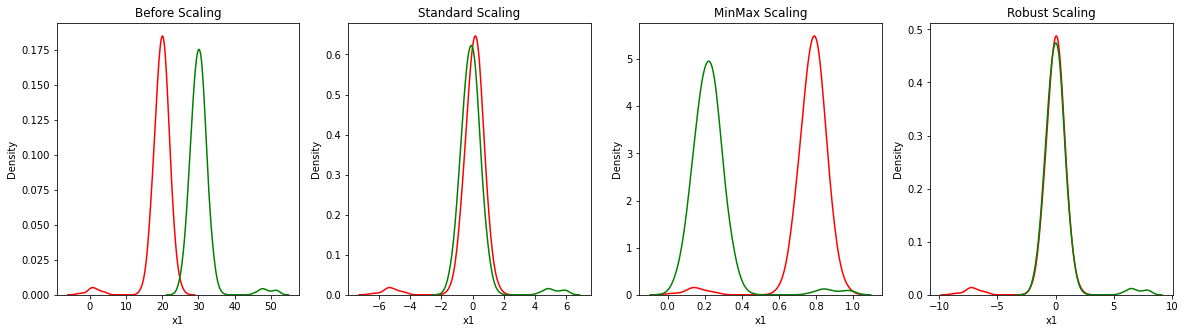

In [30]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1, color='red')
sns.kdeplot(x['x2'], ax=ax1, color='green')

ax2.set_title('Standard Scaling')
sns.kdeplot(stan_fit['x1'], ax=ax2, color='red')
sns.kdeplot(stan_fit['x2'], ax=ax2, color='green')

ax3.set_title('MinMax Scaling')
sns.kdeplot(minmax_fit['x1'], ax=ax3, color='red')
sns.kdeplot(minmax_fit['x2'], ax=ax3, color='green')

ax4.set_title('Robust Scaling')
sns.kdeplot(robust_fit['x1'], ax=ax4, color='red')
sns.kdeplot(robust_fit['x2'], ax=ax4, color='green')

plt.show()

In [31]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_dt = iris.data
iris_df = pd.DataFrame(data=iris_dt, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_df.mean())
print('\nfeature 들의 분산값')
print(iris_df.std())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산값
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [32]:
stan = StandardScaler()
stan_fit = stan.fit_transform(iris_df)
stan_df = pd.DataFrame(data = stan_fit, columns=iris.feature_names)
stan_df
print(stan_df.mean())
print(stan_df.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [33]:
minmax = MinMaxScaler()
minmax_fit = minmax.fit_transform(iris_df)
minmax_df = pd.DataFrame(minmax_fit, columns=iris.feature_names)
print(minmax_df.min())
print(minmax_df.max())


sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


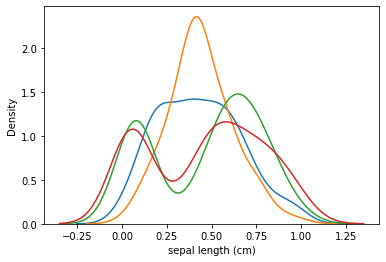

In [34]:
sns.kdeplot(minmax_df['sepal length (cm)'])
sns.kdeplot(minmax_df['sepal width (cm)'])
sns.kdeplot(minmax_df['petal length (cm)'])
sns.kdeplot(minmax_df['petal width (cm)'])
plt.show()

In [35]:
robust = RobustScaler()
robust_fit = robust.fit_transform(iris_df)
robust_df = pd.DataFrame(data = robust_fit, columns=iris.feature_names)

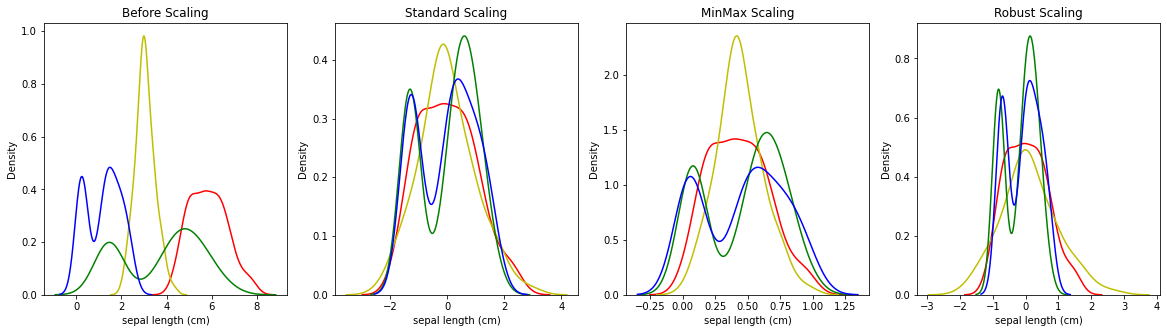

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df['petal width (cm)'], ax = ax1, color = 'b')

ax2.set_title('Standard Scaling')
sns.kdeplot(stan_df['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(stan_df['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(stan_df['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(stan_df['petal width (cm)'], ax = ax2, color = 'b')

ax3.set_title('MinMax Scaling')
sns.kdeplot(minmax_df['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(minmax_df['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(minmax_df['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(minmax_df['petal width (cm)'], ax = ax3, color = 'b')

ax4.set_title('Robust Scaling')
sns.kdeplot(robust_df['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(robust_df['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(robust_df['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(robust_df['petal width (cm)'], ax = ax4, color = 'b')
plt.show()

## train.csv로 실습 

In [57]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
train_1 = train.drop(['Name', 'SibSp', 'Ticket', 'Fare', 'PassengerId', 'Cabin', 'Parch'], axis=1)
train_1

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


In [59]:
train_1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [60]:
age_mean = np.round(train_1['Age'].mean())
train_1['Age'] = train_1['Age'].fillna(age_mean)
train_1['Embarked'] = train_1['Embarked'].fillna('S')
train_1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [61]:
encoder = LabelEncoder()
labels_s = encoder.fit_transform(train_1['Sex'])
encoder = LabelEncoder()
labels_e = encoder.fit_transform(train_1['Embarked'])

In [62]:
train_1['Sex'] = labels_s
train_1['Embarked'] = labels_e

In [63]:
train_1

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2
...,...,...,...,...,...
886,0,2,1,27.0,2
887,1,1,0,19.0,2
888,0,3,0,30.0,2
889,1,1,1,26.0,0


In [64]:
standard = StandardScaler()
s_fit = standard.fit_transform(train_1)
s_dt = pd.DataFrame(data = s_fit, columns=train_1.columns)
s_dt
print(s_dt.mean())
print(s_dt.var())

Survived    3.987333e-17
Pclass     -8.772133e-17
Sex        -1.156327e-16
Age         1.594933e-16
Embarked   -4.984166e-17
dtype: float64
Survived    1.001124
Pclass      1.001124
Sex         1.001124
Age         1.001124
Embarked    1.001124
dtype: float64


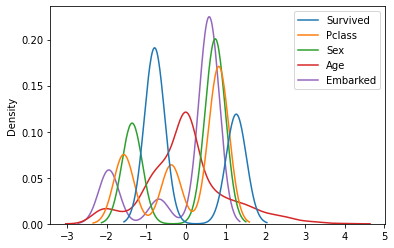

In [65]:
sns.kdeplot(data=s_dt)
plt.show()

In [46]:
robust = RobustScaler()
robust_fit = robust.fit_transform(train_1)
robust_dt = pd.DataFrame(data = robust_fit, columns=train_1.columns)
robust_dt

,Survived,Pclass,Sex,Age,Embarked
0,0.0,0.0,0.0,-0.615385,0.0
1,1.0,-2.0,-1.0,0.615385,-3.0
2,1.0,0.0,-1.0,-0.307692,0.0
3,1.0,-2.0,-1.0,0.384615,0.0
4,0.0,0.0,0.0,0.384615,0.0
...,...,...,...,...,...
886,0.0,-1.0,0.0,-0.230769,0.0
887,1.0,-2.0,-1.0,-0.846154,0.0
888,0.0,0.0,-1.0,0.000000,0.0
889,1.0,-2.0,0.0,-0.307692,-3.0


<AxesSubplot:ylabel='Density'>

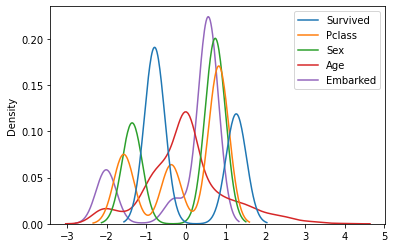

In [50]:
sns.kdeplot(data=s_dt)
# print(robust_dt['Embarked'].mean())

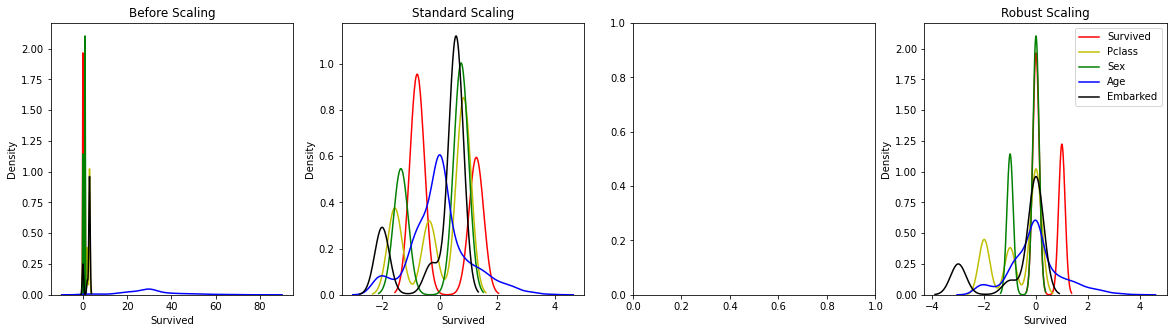

In [49]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(train_1['Survived'], ax = ax1, color = 'r')
sns.kdeplot(train_1['Pclass'], ax = ax1, color = 'y')
sns.kdeplot(train_1['Sex'], ax = ax1, color = 'g')
sns.kdeplot(train_1['Age'], ax = ax1, color = 'b')
sns.kdeplot(train_1['Embarked'], ax = ax1, color = 'black')
plt.legend(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'])

ax2.set_title('Standard Scaling')
sns.kdeplot(s_dt['Survived'], ax = ax2, color = 'r')
sns.kdeplot(s_dt['Pclass'], ax = ax2, color = 'y')
sns.kdeplot(s_dt['Sex'], ax = ax2, color = 'g')
sns.kdeplot(s_dt['Age'], ax = ax2, color = 'b')
sns.kdeplot(s_dt['Embarked'], ax = ax2, color = 'black')
plt.legend(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'])

# ax3.set_title('MinMax Scaling')
# sns.kdeplot(minmax_df['Survived'], ax = ax3, color = 'r')
# sns.kdeplot(minmax_df['Pclass'], ax = ax3, color = 'y')
# sns.kdeplot(minmax_df['Sex'], ax = ax3, color = 'g')
# sns.kdeplot(minmax_df['Age'], ax = ax3, color = 'b')
# sns.kdeplot(minmax_df['Embarked'], ax = ax3, color = 'black')

ax4.set_title('Robust Scaling')
sns.kdeplot(robust_dt['Survived'], ax = ax4, color = 'r')
sns.kdeplot(robust_dt['Pclass'], ax = ax4, color = 'y')
sns.kdeplot(robust_dt['Sex'], ax = ax4, color = 'g')
sns.kdeplot(robust_dt['Age'], ax = ax4, color = 'b')
sns.kdeplot(robust_dt['Embarked'], ax = ax4, color = 'black')
plt.legend(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()